1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = 'Image', image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### Blurring using Convolutions

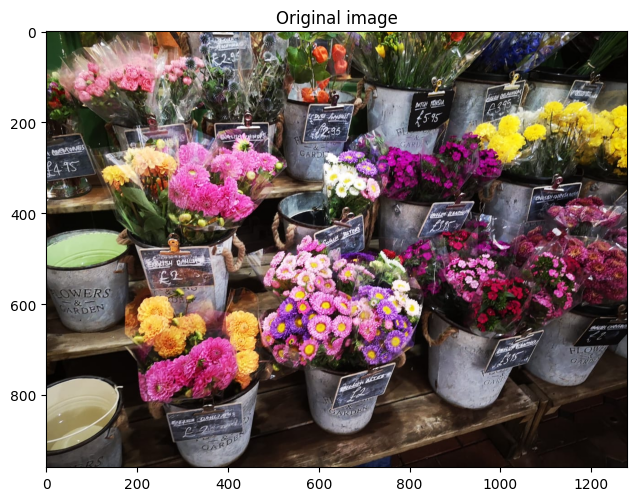

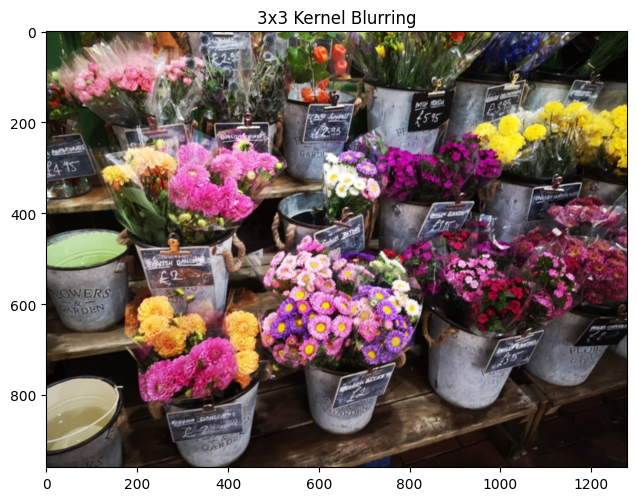

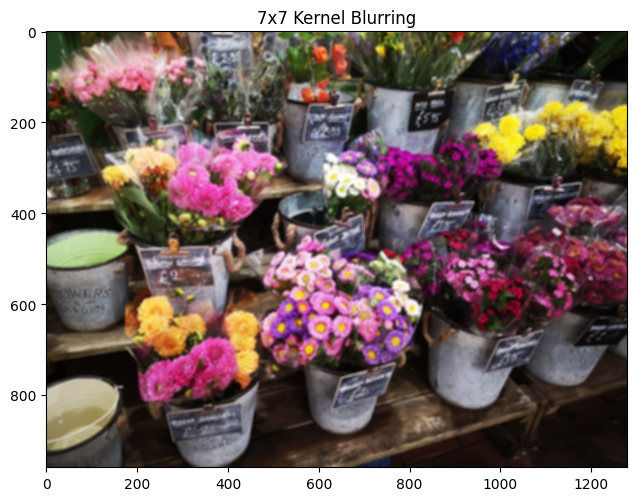

In [4]:
import cv2
import numpy as np

image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\flowers.jpeg')
imshow('Original image', image)

#Creating our  3x3 kernel
kernel_3x3 = np.ones((3,3), np.float32) / 9

#We use the cv2.fitler2d to convolve the kernel with an image
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

#Creating our 7x7 kernel
kernel_7x7 = np.ones((7,7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### Other commonly used blurring methods in OpenCV
1. Regular Blurring
2. Gaussian Blurring
3. Median Blurring

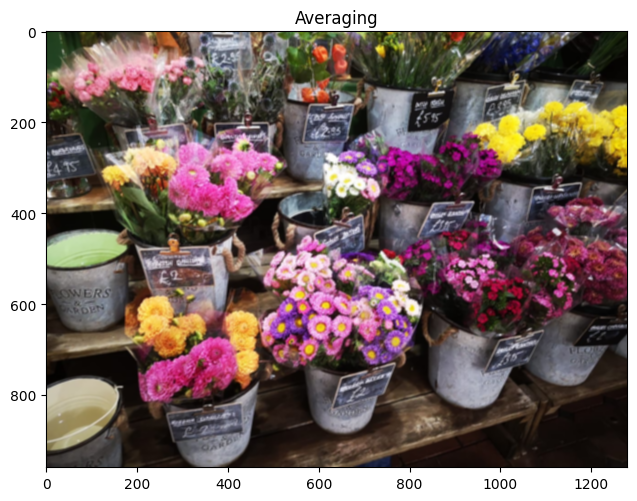

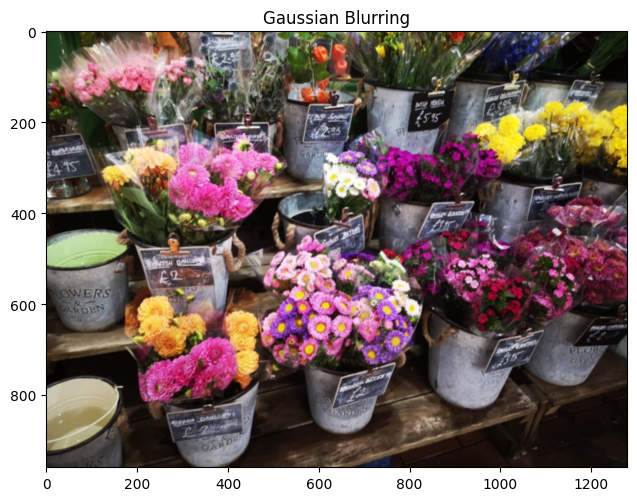

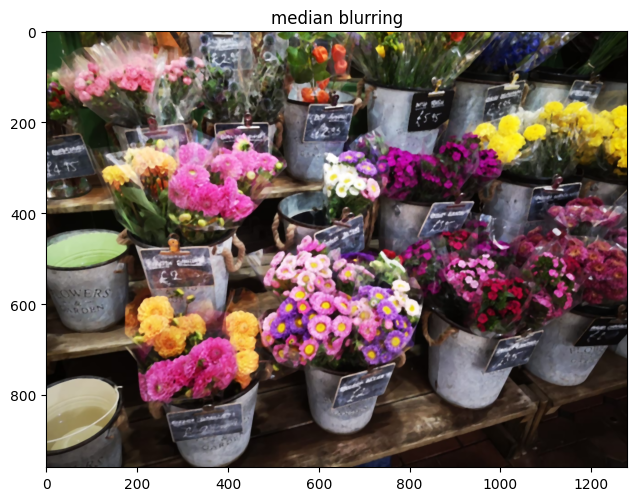

In [5]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\flowers.jpeg')

blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

median = cv2.medianBlur(image, 5)
imshow('median blurring', median)

### Bilateral Filter
dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])

* src -> Source 8-bit or floating point, -1-channel image;
* dst -> Destination image of the same size and type as src;
* d -> Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace;
* sigmaColor -> Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color;
* sigmaSpace -> Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enought(see sigmaColor). When d>0, it specifies the neighborhood size regardless of sigmaSpace.
* borderType -> border mode used to extrapolate pixels outside of the image


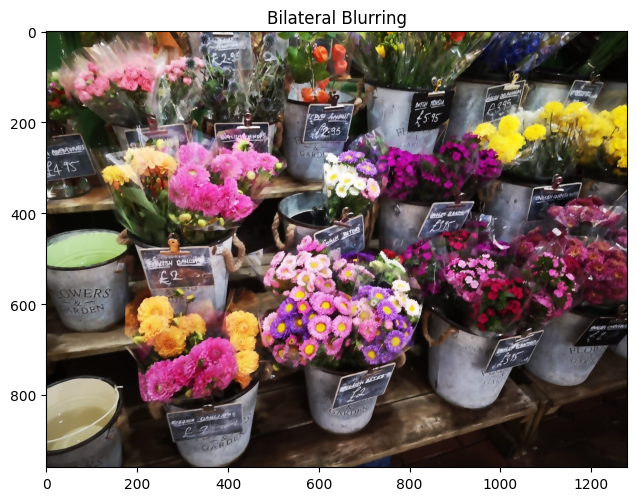

In [6]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

### Image De-noising - Non-Local Means Denoising

Existem 4 variações do método de redução de ruído Non-Local Means Denoising:

1. **cv2.fastNlMeansDenoising()** - Funciona com imagens em escala de cinza.
2. **cv2.fastNlMeansDenoisingColored()** - Funciona com imagens coloridas.
3. **cv2.fastNlMeansDenoisingMulti()** - Funciona com sequências de imagens capturadas em curtos intervalos de tempo (imagens em escala de cinza).
4. **cv2.fastNlMeansDenoisingColoredMulti()** - Similar ao anterior, mas para imagens coloridas.

### Sintaxe
```python
cv2.fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21)


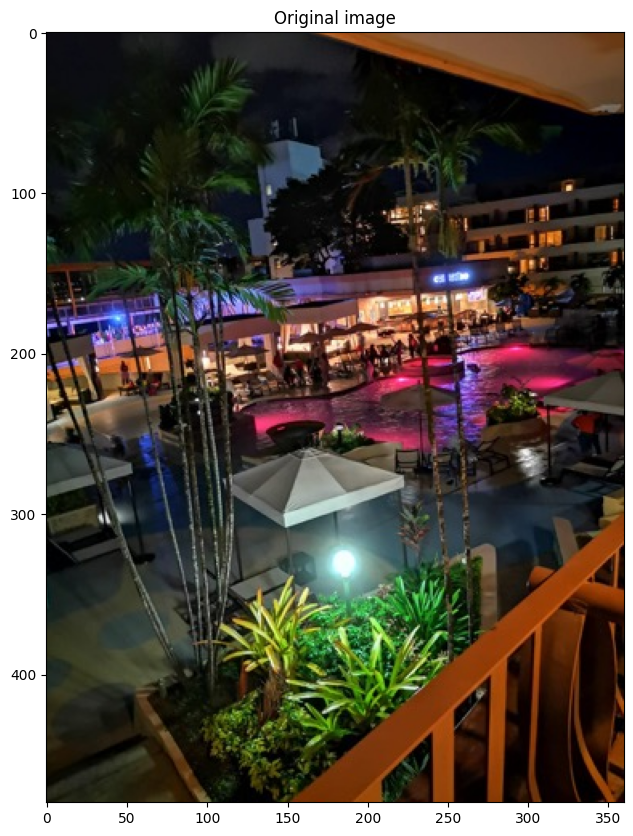

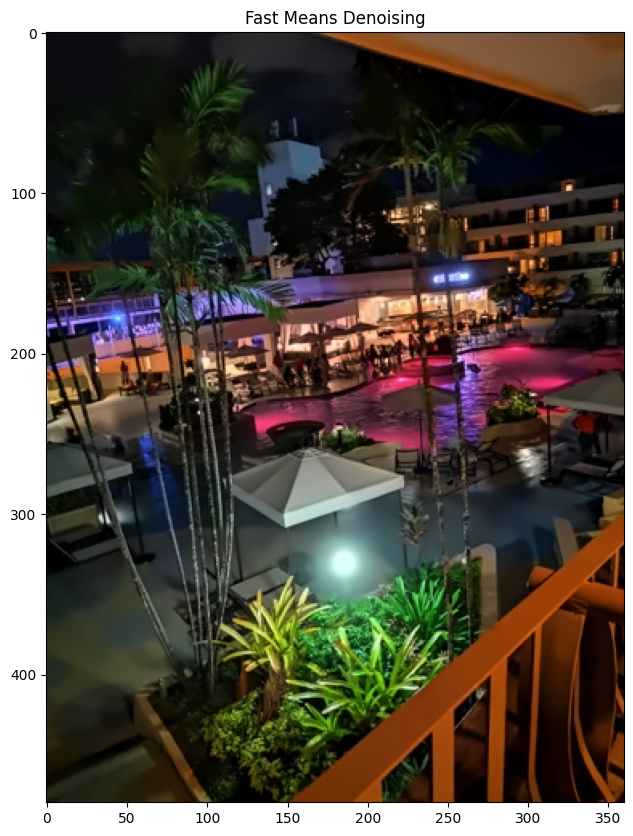

In [7]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\hilton.jpeg')
imshow('Original image', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('Fast Means Denoising', dst)

### Sharpening Images

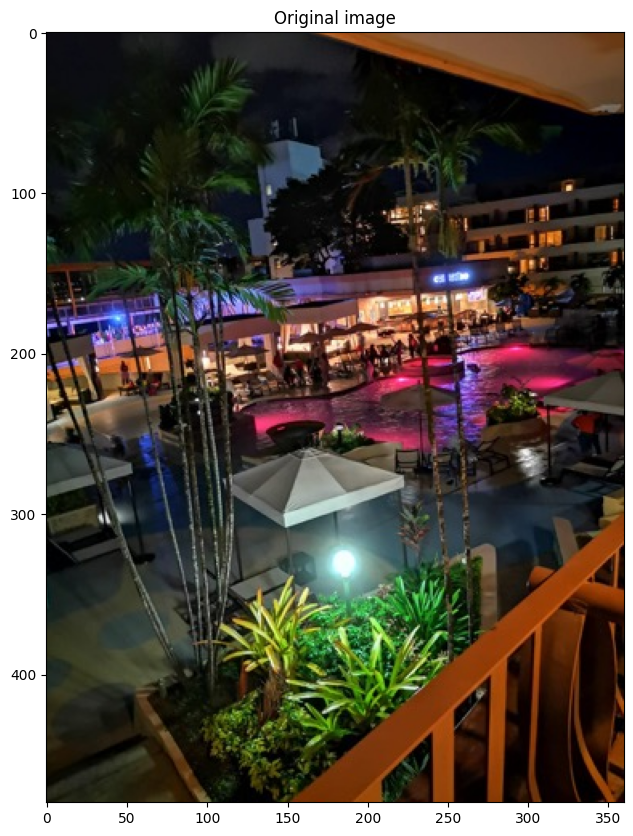

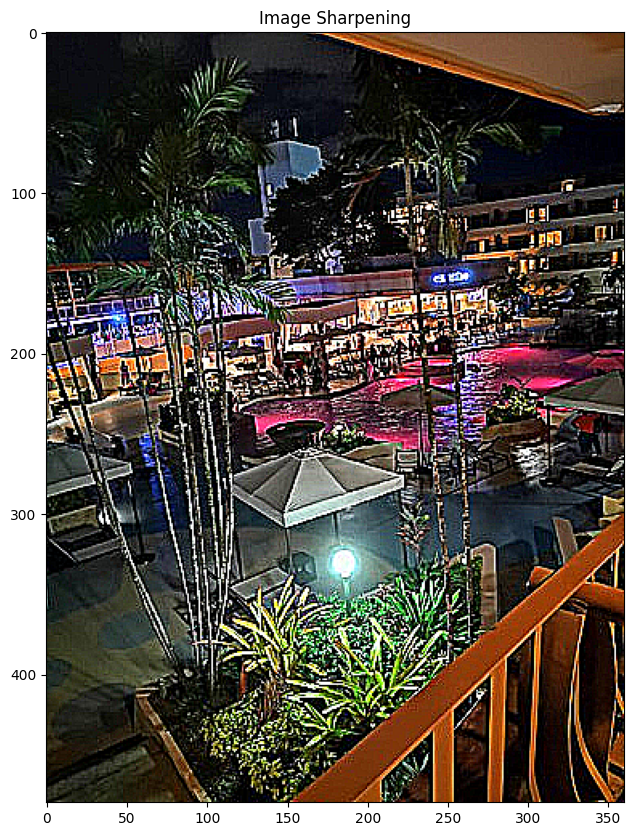

In [8]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\hilton.jpeg')
imshow('Original image', image)

#Create our shapening kernel, remember it must sum to one 
kernel_shapening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

#Applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_shapening)
imshow('Image Sharpening', sharpened)